# <font face = 'Impact' color = '#EB8F48' > Sample Demonstration on Machine Learning for Regression<font/>
#### <font face = 'Times New Roman' color = '#F5CD6A'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#3A2044'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder in doing Machine Learning in Python employing models such as Ridge Regression, LASSO Regression, Elastic Net, and Random Forest Regressor. 

# <font face = 'Palatino Linotype' color = '#5885AF'> Business Understanding:<font/>
Management seeks to gain a deeper understanding of the factors that drive employee productivity across the organization. The Human Resources and Development department has provided a comprehensive employee dataset containing demographic, performance, and engagement-related variables. The primary business objective is to DEVELOP A PREDICTIVE MODEL that accurately estimates an employee’s ProductivityScore based on key predictors such as age, department, tenure, education level, remote work ratio, job satisfaction, work hours, project load, managerial feedback, training participation, promotion history, and recent performance ratings.

By identifying and quantifying the most influential drivers of productivity, the organization aims to:
- Improve workforce management and development strategies,
- Optimize training and performance review programs,
- Support data-driven decision-making in promotions, hiring, and resource allocation, and
- Enhance overall organizational efficiency and employee satisfaction.

The success of this initiative will be measured by the model’s ability to accurately predict productivity and provide actionable insights that inform HR and management policies.

In [2]:
# Load the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # used for training and testing a model
import math # used to separate the whole number from the decimal values

In [3]:
# Load the data set
df = pd.read_csv("employee_productivity_data.csv")
df.head()

,EmployeeID,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,ProductivityScore
0,E1000,38,Sales,2,Doctorate,0.185514,5.920116,40.276694,1,6.502751,8,0,4.137347,12.476211
1,E1001,34,HR,5,Masters,0.216995,8.072396,42.061825,2,7.120543,0,1,4.074450,11.518505
2,E1002,39,Engineering,7,Doctorate,0.115267,7.648904,42.515609,7,7.060784,16,1,3.931233,0.097737
3,E1003,45,Marketing,0,Masters,0.323127,6.165400,33.347469,3,8.141761,2,0,3.242390,4.346624
4,E1004,33,Engineering,2,Double Masters,0.087053,5.761551,45.768470,3,6.819035,1,1,3.637647,5.671495


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   Department               1000 non-null   object 
 3   YearsAtCompany           1000 non-null   int64  
 4   EducationLevel           1000 non-null   object 
 5   RemoteWorkRatio          1000 non-null   float64
 6   JobSatisfactionScore     1000 non-null   float64
 7   AverageWeeklyHours       1000 non-null   float64
 8   NumProjects              1000 non-null   int64  
 9   ManagerFeedbackScore     1000 non-null   float64
 10  TrainingHoursLastYear    1000 non-null   int64  
 11  PromotionsLast5Years     1000 non-null   int64  
 12  RecentPerformanceRating  1000 non-null   float64
 13  ProductivityScore        1000 non-null   float64
dtypes: float64(6), int64(5), 

In [4]:
df.eq(' ').any()

EmployeeID                 False
Age                        False
Department                 False
YearsAtCompany             False
EducationLevel             False
RemoteWorkRatio            False
JobSatisfactionScore       False
AverageWeeklyHours         False
NumProjects                False
ManagerFeedbackScore       False
TrainingHoursLastYear      False
PromotionsLast5Years       False
RecentPerformanceRating    False
ProductivityScore          False
dtype: bool

# <font face = 'Palatino Linotype' color = '#5885AF'> Data Understanding:<font/>
   
The dataset provided by the Human Resources and Development department contains detailed records for all employees within the organization. The primary purpose of this data is to support an analytical exploration of factors influencing employee productivity, represented by the response variable ProductivityScore.

The dataset includes a mix of demographic, behavioral, and performance-related variables that may influence productivity. The predictor variables are as follows:
- Age – The employee’s age in years, representing workforce demographics.
- Department – The functional area or division where the employee works (categorical).
- YearsAtCompany – The number of years the employee has been with the organization, reflecting experience and organizational familiarity.
- EducationLevel – The highest education qualification level attained (ordinal).
- RemoteWorkRatio – The proportion of work done remotely, indicating work flexibility.
- JobSatisfactionScore – A self-reported or survey-based score indicating job satisfaction.
- AverageWeeklyHours – The average number of hours worked per week.
- NumProjects – The number of projects currently or recently handled by the employee.
- ManagerFeedbackScore – The manager’s performance feedback rating.
- TrainingHoursLastYear – The total number of hours spent in training over the past year.
- PromotionsLast5Years – The number of promotions received within the last five years.
- RecentPerformanceRating – The most recent formal performance appraisal score.

The dataset is expected to include both numerical and categorical data types, potentially with varying scales and distributions. Before modeling, the data will need to be explored and preprocessed to ensure quality and reliability. This will involve checking for missing values, outliers, inconsistent data entries, and correlations among variables. Exploratory Data Analysis (EDA) will also be performed to uncover patterns, relationships, and possible drivers of productivity.

Understanding these characteristics will guide appropriate feature engineering, data transformation, and model selection steps to ensure that the resulting machine learning model accurately reflects the underlying dynamics of employee productivity within the organization.

# <font face = 'Palatino Linotype' color = '#5885AF'> Data Preparation:<font/>

In [3]:
# Drop the irrelevant feature for developing the machine learning model.
df = df.drop(['EmployeeID'], axis = 1)
df.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,ProductivityScore
0,38,Sales,2,Doctorate,0.185514,5.920116,40.276694,1,6.502751,8,0,4.137347,12.476211
1,34,HR,5,Masters,0.216995,8.072396,42.061825,2,7.120543,0,1,4.074450,11.518505
2,39,Engineering,7,Doctorate,0.115267,7.648904,42.515609,7,7.060784,16,1,3.931233,0.097737
3,45,Marketing,0,Masters,0.323127,6.165400,33.347469,3,8.141761,2,0,3.242390,4.346624
4,33,Engineering,2,Double Masters,0.087053,5.761551,45.768470,3,6.819035,1,1,3.637647,5.671495


In [4]:
# Split the dataset into train and test sets.
# Given 12 explanatory variables we would at need > 146 observations for
# training a regression model (Tabachnick and Fidell, 2013). The 70-30 split
# will be used for this project. 
train, test = train_test_split(df, test_size=0.30, random_state=42)
print(f'''The number of records for the train set is {len(train)}.
The number of records for the test set is {len(test)}.''')
# Source: Tabachnick, B.G.,Fidell, L.S., 2013. Using Multivariate Statistics, 
#         6th ed. Pearson Education, Inc., Boston. 

The number of records for the train set is 700.
The number of records for the test set is 300.


In [5]:
# Separating the explanatory variables from the outcome variable.
x_train = train.drop(['ProductivityScore'], axis = 1)
y_train = train['ProductivityScore']
x_train.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating
541,27,Finance,19,Masters,0.318567,6.338491,42.556954,6,8.296587,16,1,2.822625
440,37,Engineering,0,Doctorate,0.470034,3.622929,48.808036,2,4.030609,9,0,2.901293
482,23,IT,0,Double Doctorate,0.293242,3.244847,40.723709,4,8.124908,2,0,2.176832
422,33,Finance,8,Double Masters,0.112839,4.997061,40.719208,3,5.742014,28,0,3.471394
778,34,Sales,7,Double Masters,0.062158,6.319681,48.395419,1,6.399914,13,0,3.726580


In [6]:
# Separating the explanatory variables from the outcome variable.
x_test = test.drop(['ProductivityScore'], axis = 1)
y_test = test['ProductivityScore']
x_test.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating
521,38,Sales,0,Double Masters,0.246990,8.074922,38.760913,3,8.025122,7,0,2.586867
737,41,HR,16,Double Masters,0.555279,6.719708,44.123997,1,7.363437,46,2,5.000000
740,22,Finance,1,Double Masters,0.203573,4.621592,38.109093,2,5.926731,31,0,3.973682
660,30,HR,1,Doctorate,0.210185,6.427122,32.175514,5,6.514476,11,0,1.000000
411,27,HR,2,Masters,0.156057,6.115394,43.016769,2,9.402989,45,1,3.380332


In [7]:
# Standardize all the continuous variables.
from sklearn.preprocessing import StandardScaler

# Assigning feature labels to variable continuous_vars.
continuous_vars = ['Age','YearsAtCompany', 'RemoteWorkRatio', 'JobSatisfactionScore',
                   'AverageWeeklyHours','NumProjects', 'ManagerFeedbackScore', 'TrainingHoursLastYear',
                  'PromotionsLast5Years']

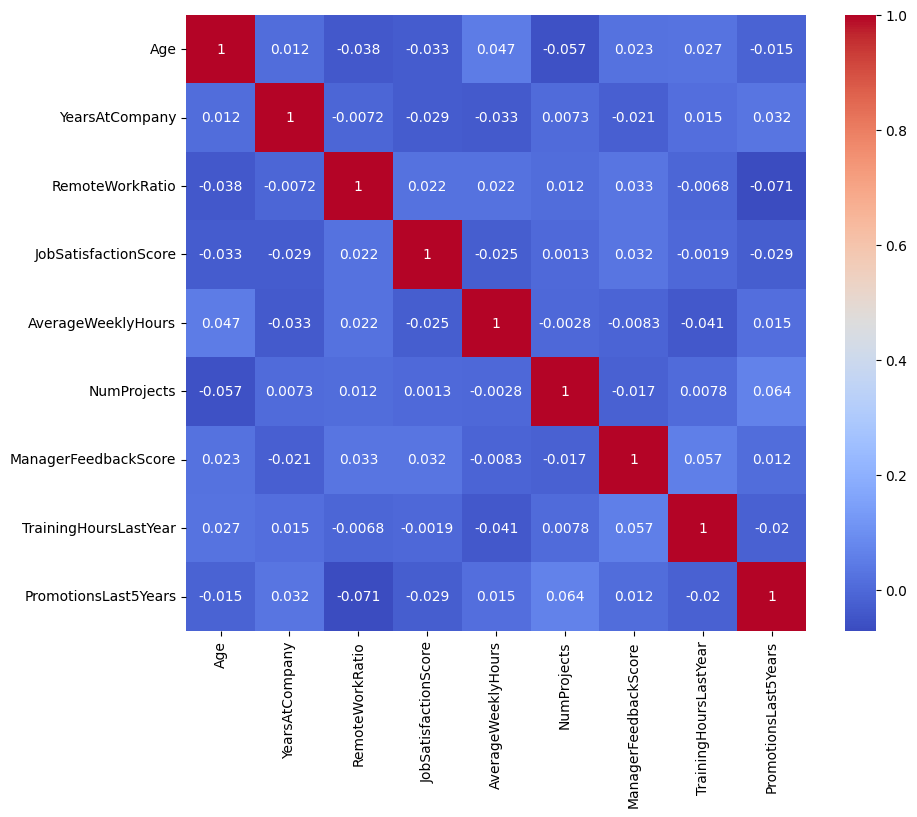

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Checking for Multicollinearity among continuous variables using correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(x_train[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: Ridge Regression<font/>

In [10]:
# Training a machine learning model for a regression problem using the x_train dataset and the
# outcome variable y_train.
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, make_scorer
import warnings
warnings.filterwarnings("ignore")

# Establishing the pre-processing in preparation for machine learning
continuous_vars = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_vars = x_train.select_dtypes(include=["object", "category"]).columns.tolist()

# Preprocessing for each type
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, continuous_vars),
        ("cat", categorical_transformer, categorical_vars)
    ]
)

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("ridge", Ridge())
])

# Define hyperparameters to tune
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength (L2 penalty)
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver options
}

# Define a custom RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                           greater_is_better=False)  # smaller RMSE is better

# Perform cross-validation grid search with RMSE scoring
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best CV RMSE
best_cv_rmse = -grid_search.best_score_ # negative because greater_is_better=False
print("Best Cross-Validation RMSE:", np.round(best_cv_rmse, 4))

# Get the best model
best_model_ridge = grid_search.best_estimator_

# RMSE on training set
y_train_pred = best_model_ridge.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", np.round(rmse_train, 4))

# RMSE on test set
y_test_pred = best_model_ridge.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.round(rmse_test, 4))

Best hyperparameters: {'ridge__alpha': 10.0, 'ridge__solver': 'saga'}
Best Cross-Validation RMSE: 5.553
Train RMSE: 5.4377
Test RMSE: 4.6487


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: LASSO Regression<font/>

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, make_scorer

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lasso", Lasso())
])

# Define hyperparameters to tune
param_grid = {
    'lasso__alpha': np.logspace(-3, 1, 15),
    'lasso__max_iter': [1000, 5000],
    'lasso__tol': [1e-4, 1e-3],
    'lasso__selection': ["cyclic", "random"]
}

# Define a custom RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                           greater_is_better=False)  # smaller RMSE is better

# Perform cross-validation grid search
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best CV RMSE
best_cv_rmse = -grid_search.best_score_ # negative because greater_is_better=False
print("Best Cross-Validation RMSE:", np.round(best_cv_rmse, 4))

# Get the best model
best_model_lasso = grid_search.best_estimator_

# RMSE on training set
y_train_pred = best_model_lasso.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", np.round(rmse_train, 4))

# RMSE on test set
y_test_pred = best_model_lasso.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.round(rmse_test, 4))

Best hyperparameters: {'lasso__alpha': np.float64(0.19306977288832497), 'lasso__max_iter': 5000, 'lasso__selection': 'random', 'lasso__tol': 0.0001}
Best Cross-Validation RMSE: 5.4457
Train RMSE: 5.4667
Test RMSE: 4.5832


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: Elastic Net<font/>

In [11]:
# Performing Elastic Net Regression
# Import necessary libraries
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.datasets import make_regression

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, continuous_vars),
        ("cat", categorical_transformer, categorical_vars)
    ]
)

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("elastic", ElasticNet())
])

# Define hyperparameters to tune
param_grid = {
    'elastic__alpha': np.logspace(-3, 1, 20),
    'elastic__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

# Define a custom RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                           greater_is_better=False)  # smaller RMSE is better


# Perform grid search to find the best hyperparameters
grid_search  = GridSearchCV(estimator=pipeline, 
                            param_grid=param_grid, 
                            scoring='neg_root_mean_squared_error', 
                            cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best CV RMSE
best_cv_rmse = -grid_search.best_score_ # negative because greater_is_better=False
print("Best Cross-Validation RMSE:", np.round(best_cv_rmse, 4))

# Get the best model
best_model_elastic = grid_search.best_estimator_

# RMSE on training set
y_train_pred = best_model_elastic.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", np.round(rmse_train, 4))

# RMSE on test set
y_test_pred = best_model_elastic.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.round(rmse_test, 4))

Best hyperparameters: {'elastic__alpha': np.float64(0.20691380811147903), 'elastic__l1_ratio': 0.7}
Best Cross-Validation RMSE: 5.4451
Train RMSE: 5.4609
Test RMSE: 4.5843


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: Random Forest Regressor<font/>

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, make_scorer

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor())
])

# Define hyperparameters grid
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Define a custom RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                           greater_is_better=False)  # smaller RMSE is better

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_root_mean_squared_error' )

# Perform GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best CV RMSE
best_cv_rmse = -grid_search.best_score_ # negative because greater_is_better=False
print("Best Cross-Validation RMSE:", np.round(best_cv_rmse, 4))

# Get the best model
best_model_rf = grid_search.best_estimator_

# RMSE on training set
y_train_pred = best_model_rf.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", np.round(rmse_train, 4))

# RMSE on test set
y_test_pred = best_model_rf.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.round(rmse_test, 4))

Best hyperparameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best Cross-Validation RMSE: 5.5904
Train RMSE: 3.7886
Test RMSE: 4.809


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
import xgboost as xgb


# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", xgb.XGBRegressor(objective='reg:squarederror'))
])


# Hyperparameters to tune
param_grid = {
    'xgb__n_estimators': [100, 200, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0]
}

# Define custom RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                           greater_is_better=False)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Best CV RMSE
best_cv_rmse = -grid_search.best_score_
print("Best Cross-Validation RMSE:", np.round(best_cv_rmse, 4))

# Best model
best_model_xgb = grid_search.best_estimator_

# RMSE on training set
y_train_pred = best_model_xgb.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", np.round(rmse_train, 4))

# RMSE on test set
y_test_pred = best_model_xgb.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.round(rmse_test, 4))

Best hyperparameters: {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.7}
Best Cross-Validation RMSE: 5.4593
Train RMSE: 5.204
Test RMSE: 4.6244


# <font face = 'Palatino Linotype' color = '#5885AF'> Saving the Model for Future Deployment<font/>

In [12]:
# Save a copy of the Random Forest Model.
import pickle
pickle.dump(best_model_elastic, open('ENmodel.pkl', 'wb'))

# Decision

Given the results of the CV RMSE across the different models, Elastic Net Regression and Lasso Regression have promising model performance given the small difference between train and CV RMSE together with better test RMSE compared to others. Given that Elastic Net has a somewhat smaller test RMSE, this will be the model that we will deploy.